In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('VOCDev.csv')
df.head()

,year,imageset,imagename,imagewidth,imageheight,class,difficulty,pose,truncated,xmin,xmax,ymin,ymax
0,2007,train,12,500,333,car,0,Rear,0,156,351,97,270
1,2007,train,17,480,364,person,0,Left,0,185,279,62,199
2,2007,train,17,480,364,horse,0,Left,0,90,403,78,336
3,2007,train,23,334,500,bicycle,0,Unspecified,1,9,245,230,500
4,2007,train,23,334,500,bicycle,0,Frontal,1,230,334,220,500


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15662 entries, 0 to 15661
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         15662 non-null  int64 
 1   imageset     15662 non-null  object
 2   imagename    15662 non-null  int64 
 3   imagewidth   15662 non-null  int64 
 4   imageheight  15662 non-null  int64 
 5   class        15662 non-null  object
 6   difficulty   15662 non-null  int64 
 7   pose         15662 non-null  object
 8   truncated    15662 non-null  int64 
 9   xmin         15662 non-null  int64 
 10  xmax         15662 non-null  int64 
 11  ymin         15662 non-null  int64 
 12  ymax         15662 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.6+ MB


In [52]:
import xml.etree.ElementTree as ET
import os
from os import listdir, getcwd
from os.path import join

#Get current directory. We assume we have VOCDevkit in current working directory
wd = getcwd()

In [53]:
#Getting only the classes car, person, bicycle, motorbike, and bus
df = df[df['class'].isin({'car', 'person', 'bicycle', 'motorbike', 'bus'})]

In [60]:
df.shape

(8171, 13)

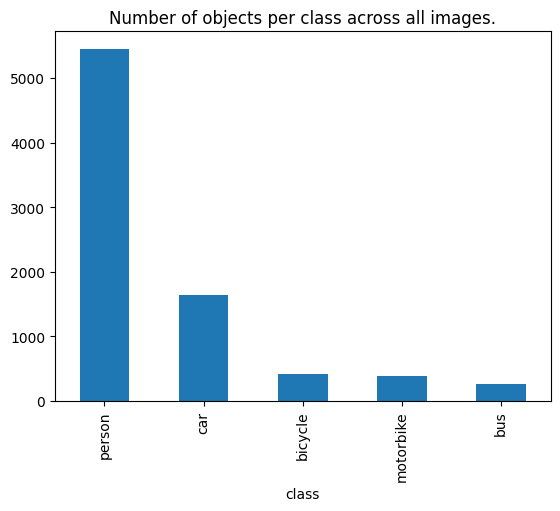

In [54]:
#Check the number of objects per class
#Note that we are using the df and not df_imgUnique. Each image may contain objects of different class
df['class'].value_counts().plot(kind='bar')
plt.title('Number of objects per class across all images.')
plt.show()

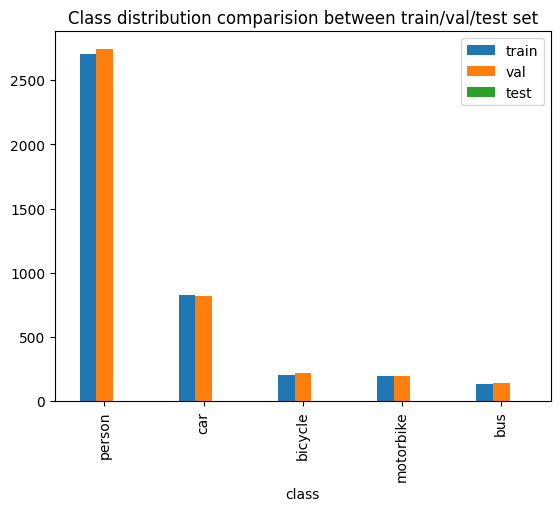

In [55]:
#Check out the class distribution between 2007 and 2012
df_train = df[df['imageset']=='train']
objCountTrain = df_train['class'].value_counts().rename('train')

df_val = df[df['imageset']=='val']
objCountVal = df_val['class'].value_counts().rename('val')

df_test = df[df['imageset']=='test']
objCountTest = df_test['class'].value_counts().rename('test')


df_objCount = pd.concat([objCountTrain, objCountVal, objCountTest], axis=1)
df_objCount.plot(kind='bar')
plt.title('Class distribution comparision between train/val/test set')
plt.show()

c:\Users\stace\Downloads\VOCdevkit\VOC2007\VOC2007/JPEGImages/009958.jpg


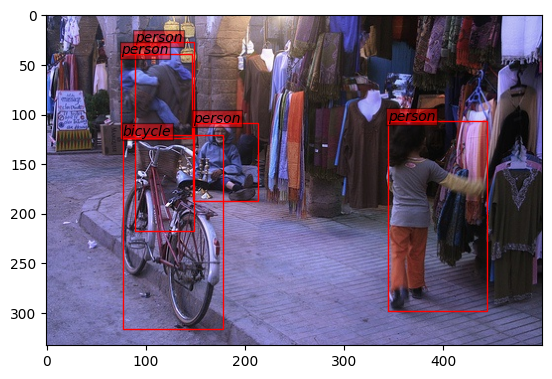

In [64]:
import matplotlib.image as mpimg
import matplotlib.patches as patches

objToInspect = 8170

object = df.iloc[objToInspect]

imgPath = '%s/JPEGImages/00%s.jpg' % (wd, object['imagename'])
print(imgPath)
img = mpimg.imread(imgPath)

fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)
df_boxes = df[df['imagename']==object['imagename']]
boxes = df_boxes[['class','xmin','xmax','ymin','ymax']].values.tolist()

for classname, xmin, xmax, ymin, ymax in boxes: 
    # Draw bounding box
    rect = patches.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,linewidth=1,edgecolor='r',facecolor='none')
    ax.text(xmin, ymin, classname, style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})
    ax.add_patch(rect)

imgplot = plt.show()